Looking for the best model for predicting breast cancer from BC Data. 

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance


In [2]:
df = pd.read_csv('data/BC_Data.csv')

In [3]:
df.head()

,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.drop('ID', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [7]:
df.replace(to_replace = {'Bare_Nuclei':{'?':np.nan}}, inplace=True)
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [8]:
df.isnull().sum()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [10]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean(), inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [13]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

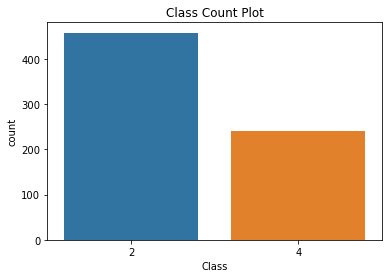

In [16]:
sns.countplot(data = df, x = 'Class')
plt.title('Class Count Plot')
plt.show()

In [171]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:xlabel='Class', ylabel='Clump_Thickness'>

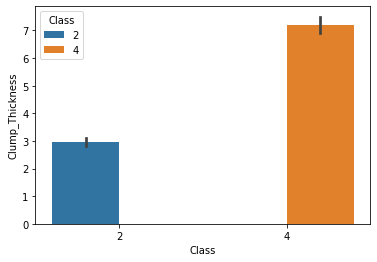

In [172]:
#boxplots class vs target
sns.barplot(y='Clump_Thickness', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Uniformity_of_Cell_Size'>

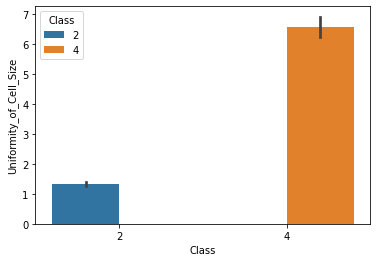

In [173]:
sns.barplot(y='Uniformity_of_Cell_Size', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Uniformity_of_Cell_Shape'>

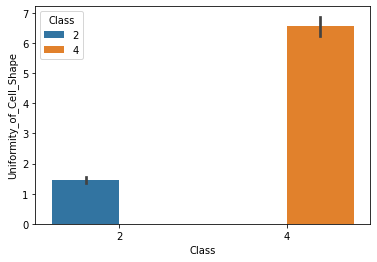

In [174]:
sns.barplot(y='Uniformity_of_Cell_Shape', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Marginal_Adhesion'>

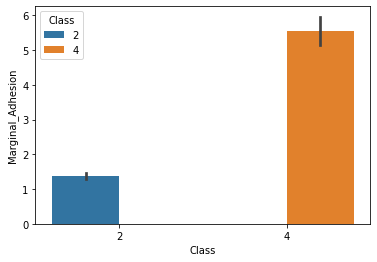

In [175]:
sns.barplot(y='Marginal_Adhesion', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Single_Epithelial_Cell_Size'>

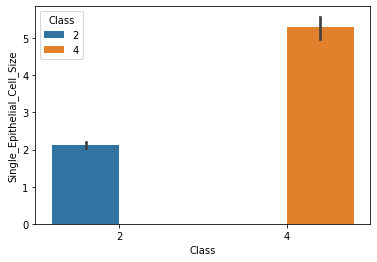

In [176]:
sns.barplot(y='Single_Epithelial_Cell_Size', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Bare_Nuclei'>

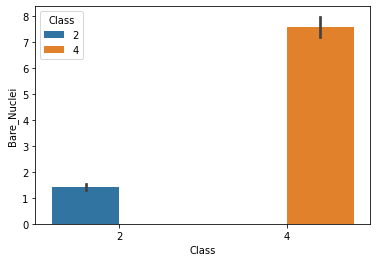

In [177]:
sns.barplot(y='Bare_Nuclei', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Bland_Chromatin'>

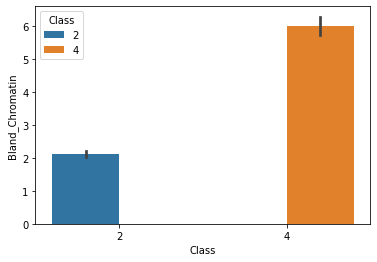

In [178]:
sns.barplot(y='Bland_Chromatin', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Normal_Nucleoli'>

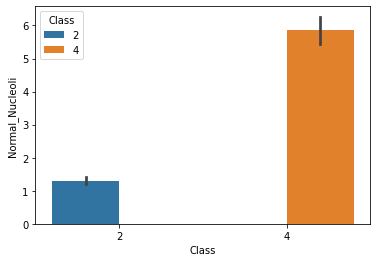

In [179]:
sns.barplot(y='Normal_Nucleoli', x='Class', data=df, hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Mitoses'>

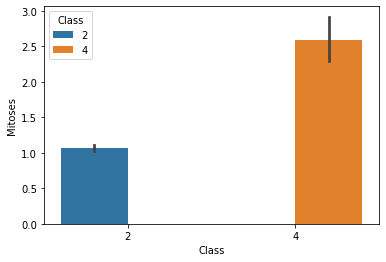

In [180]:
sns.barplot(y='Mitoses', x='Class', data=df, hue='Class')

In [181]:
corr = df.corr()

In [182]:
corr['Class'].sort_values(ascending=False)

Class                          1.000000
Uniformity_of_Cell_Shape       0.818934
Uniformity_of_Cell_Size        0.817904
Bare_Nuclei                    0.816050
Bland_Chromatin                0.756616
Clump_Thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

In [183]:
# Drop cols w/Multicollinearity and re-run heatmap
df.drop('Uniformity_of_Cell_Size', axis = 1, inplace = True)
df.drop('Mitoses', axis = 1, inplace = True)
corr = df.corr()
df.head()

,Clump_Thickness,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Class
0,5,1,1,2,1.0,3,1,2
1,5,4,5,7,10.0,3,2,2
2,3,1,1,2,2.0,3,1,2
3,6,8,1,3,4.0,3,7,2
4,4,1,3,2,1.0,3,1,2


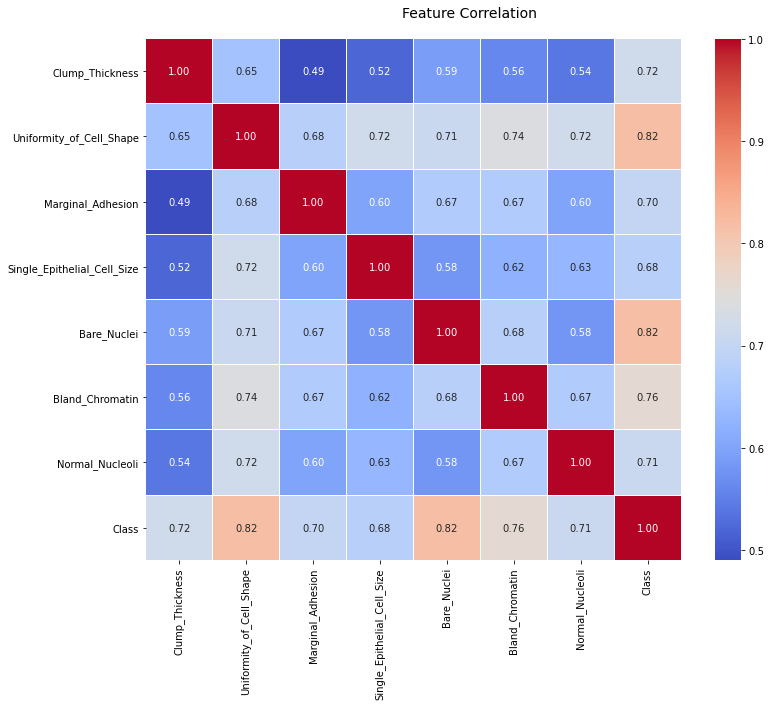

In [184]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = "coolwarm", fmt = '.2f', linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle('Feature Correlation', fontsize = 14)

In [185]:
# split X and y into training and testing sets
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
cols = X.columns

In [186]:
X_train.shape, y_train.shape

((489, 7), (489,))

In [187]:
X_test.shape, y_test.shape

((210, 7), (210,))

In [188]:
# Scale data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

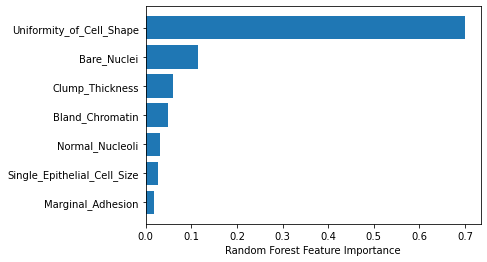

In [189]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [190]:
# Logistic Regression
C = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2']
solver = ['liblinear']

param_grid = {'C' : C, 'penalty' : penalty, 'solver' : solver}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}


In [191]:
# GridSearchCV
rf = LogisticRegression()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
est = gs.fit(X_train, y_train)

print('Best Estimates:')
print(est.best_estimator_)
print(est.best_score_)

Best Estimates:
LogisticRegression(C=1, solver='liblinear')
0.9936130536130536


In [192]:
# Fitting the model with the optimal hyperparameters
rf = LogisticRegression(solver='liblinear', C=1, penalty='l1')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_test, y_test, scoring = 'accuracy').mean()
print('Logistic Regression:')
print("Accuracy: ", acc)
print("Cross Value Score: ", cv)

Logistic Regression:
Accuracy:  0.9809523809523809
Cross Value Score:  0.9761904761904763


In [193]:
# ROC-AUC Score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9957264957264956


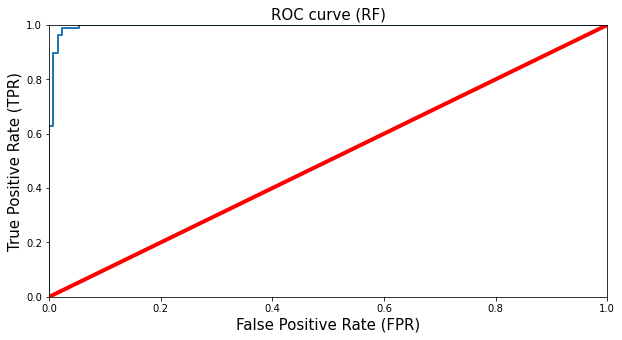

In [194]:
# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf, pos_label=4)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("BC_roc_curve_LR.jpg")
plt.show()

In [195]:
# Predict using the model and show confusion matrix:
print('Logistic Regression Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Logistic Regression Confusion Matrix
[[129   3]
 [  1  77]]


In [198]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       132
           4       0.96      0.99      0.97        78

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [201]:
# Build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [202]:
# GridSearchCV - finding the optimal hyperparameters
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
est = gs.fit(X_train, y_train)

print('RandomForestClassifier:')
print(est.best_estimator_)
print(est.best_score_)

RandomForestClassifier:
RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=17)
0.9906990393228924


In [205]:
# Fitting the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 17, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, min_samples_leaf = 2, bootstrap = False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_test, y_test, scoring = 'roc_auc').mean()
print('RandomForestClassifier:')
print("Accuracy Score: ", acc)
print("Cross Value Score: ", cv)

RandomForestClassifier:
Accuracy Score:  0.9714285714285714
Cross Value Score:  0.9920673076923077


In [206]:
# ROC-AUC Score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9944638694638694


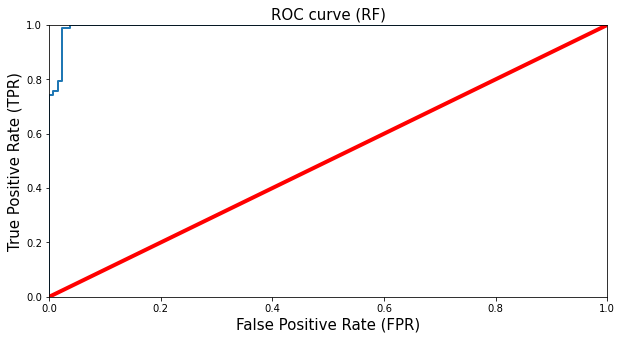

In [207]:
# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf, pos_label=4)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("BC_roc_curve_RF.jpg")
plt.show()

In [208]:
# Predict using the model and show confusion matrix:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[127   5]
 [  1  77]]


In [209]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98       132
           4       0.94      0.99      0.96        78

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



In [210]:
# KNeighborsClassifier
print(KNeighborsClassifier().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [211]:
# Finding the optimal hyperparameters
param_grid ={
            "n_neighbors":[10,20,50,100,150],
            "algorithm":['auto','ball_tree','kd_tree','brute'],
            "weights":['uniform','distance']
            }
print(param_grid)

{'n_neighbors': [10, 20, 50, 100, 150], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


In [212]:
#GridSearchCV
rf = KNeighborsClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
gs = gs.fit(X_train, y_train)

print('Scores:')
print(gs.best_estimator_)
print(gs.best_score_)


Scores:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=100, weights='distance')
0.9855610127781382


In [213]:
#Fitting the model with the optimal hyperparameters
rf = KNeighborsClassifier(n_neighbors = 100, algorithm = 'ball_tree', weights = 'distance')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_test, y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", acc)
print("CV Score: ", cv)

Accuracy Score:  0.9619047619047619
CV Score:  0.9899038461538462


In [214]:
#ROC-AUC Score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9932983682983683


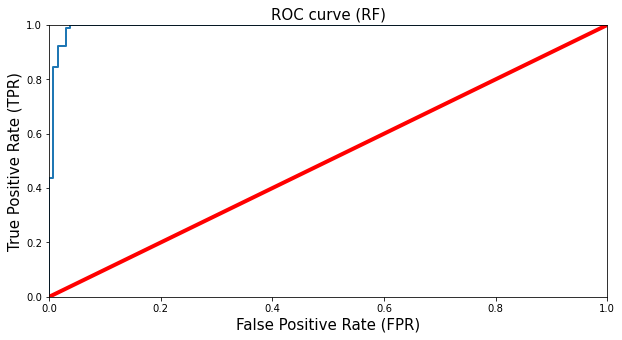

In [215]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf, pos_label=4)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("BC_roc_curve_KN.jpg")
plt.show()

In [216]:
# Classification Report KNeighborsClassifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       132
           4       0.95      0.95      0.95        78

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



I apply different ML models above and evaluate their performance for the data, tabulate the scores and put them in a confusion matrix. I also perform a GridsearchCV hyperparameter tuning for each model as well determine the ROC_AUC scores. I also perform a ROC curve for each model and the Classification Report follows that. The Logistic Regression model appears to be the best. FPR is very low, which is great! 